In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from Constant import Constant
from Moment import Moment
from Team import Team
from Game import Game
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.patches import Circle, Rectangle, Arc
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import copy

In [3]:
from collections import defaultdict
import os

In [4]:
import torch

In [5]:
import util

In [6]:
game = Game('data/0021500001.json')
game.read_json()

loading  472


In [7]:
df = pd.read_json('data/0021500001.json')

In [8]:
class MyGame():
    def __init__(self, path):
        pass

In [9]:
print(f"Total events: {len(df)}")
print(f"Total moments: {np.sum([len(df['events'][i]['moments']) for i in range(len(df['events']))])}")
# print(f"moments/event: {[len(df['events'][i]['moments']) for i in range(len(df['events']))]}")

Total events: 472
Total moments: 222856


In [81]:
import data

In [96]:
data.game_df2list_events(df, tqdm=tqdm)

AttributeError: module 'data' has no attribute 'game_df2list_events'

In [18]:
data = get_data(df, True)
b = util.dict_list2list_dict(data)

  0%|          | 0/504 [00:00<?, ?it/s]

Deleted 0059 (12.6%) events | 028859 (13.5%) moments
   Kept 0410 (87.4%) events | 184232 (86.5%) moments



In [39]:
# ds = init_ds(games, teams, players, b[100])
ds = [init_ds(games, teams, players, bi, mask=True) for bi in tqdm(b)]
for key, value in ds[1].items(): print(f'{key:>10} {value.shape}')

  0%|          | 0/410 [00:00<?, ?it/s]

   id_game torch.Size([329])
   id_team torch.Size([329, 11])
 id_player torch.Size([329, 11])
   quarter torch.Size([329])
    t_game torch.Size([329])
    t_shot torch.Size([329])
         x torch.Size([329, 11, 3])
        nx torch.Size([329, 11, 3])
         v torch.Size([329, 11, 3])
        nv torch.Size([329, 11, 3])
         a torch.Size([329, 11, 3])
        na torch.Size([329, 11, 3])


In [41]:
init_ds(games, teams, players, b[0], mask=True, verbose=True);

Mask           mask_nan_x removes          0/       147 frames.
Mask          mask_nan_id removes          0/       147 frames.
Mask      mask_nan_t_shot removes          0/       147 frames.
Mask       mask_id_change removes          0/       147 frames.
Mask     mask_dt_game_bad removes          0/       147 frames.
Mask     mask_dt_shot_bad removes          0/       147 frames.
Mask      mask_speed_ball removes          0/       147 frames.
Mask     mask_speed_human removes          0/       147 frames.
Mask           mask_total removes          0/       147 frames.


In [98]:
data.process_data_dir(tqdm=tqdm)

  0%|          | 0/7 [00:00<?, ?it/s]

Processing Game: data_small/0021500003.json


  0%|          | 0/517 [00:00<?, ?it/s]

Processing Game: data_small/0021500005.json


  0%|          | 0/491 [00:00<?, ?it/s]

Processing Game: data_small/0021500007.json


  0%|          | 0/444 [00:00<?, ?it/s]

Processing Game: data_small/0021500001.json


  0%|          | 0/472 [00:00<?, ?it/s]

Processing Game: data_small/0021500002.json


  0%|          | 0/488 [00:00<?, ?it/s]

Processing Game: data_small/0021500009.json


  0%|          | 0/519 [00:00<?, ?it/s]

Processing Game: data_small/0021500004.json


  0%|          | 0/504 [00:00<?, ?it/s]

  0%|          | 0/2254 [00:00<?, ?it/s]

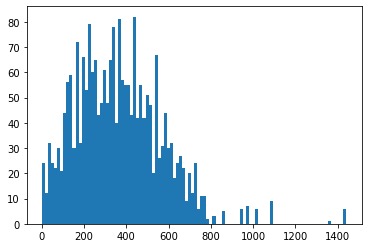

In [123]:
a = [torch.load(f'data_processed/{f}')['x'].shape[0] for f in tqdm(os.listdir('data_processed/')) if f.endswith('.pth')]
plt.hist(a, bins=100);

In [695]:
torch.cat(util.list_dict2dict_list(ds)['x'], dim=0).shape

torch.Size([196575, 11, 3])

In [697]:
torch.cat(util.list_dict2dict_list(ds)['x'], dim=0).shape

torch.Size([147569, 11, 3])

In [26]:
ds0 = ds[0]
%store ds0

Stored 'ds0' (dict)


In [27]:
ds0['id_player']

tensor([[    -1, 202696, 202699,  ..., 202322, 203078, 203490],
        [    -1, 202696, 202699,  ..., 202322, 203078, 203490],
        [    -1, 202696, 202699,  ..., 202322, 203078, 203490],
        ...,
        [    -1, 202696, 202699,  ..., 202322, 203078, 203490],
        [    -1, 202696, 202699,  ..., 202322, 203078, 203490],
        [    -1, 202696, 202699,  ..., 202322, 203078, 203490]])

In [31]:
players[203490]

{'lastname': 'Porter',
 'firstname': 'Otto',
 'jersey': '22',
 'position': 'F',
 'id': 203490,
 'ohid': 164,
 'id_team': 1610612764}

In [34]:
ds0['x'].shape

torch.Size([147, 11, 3])

In [611]:
b[0]['id_player'].shape

(150, 11)

In [527]:
[np.isnan(a).any() for a in data['t_shot']]

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [145]:
for path in tqdm(os.listdir('data')):
    if not path.endswith('.json'):
        continue
        
    df = pd.read_json('data/'+path)

    data = get_data(df)
    event_mask = np.array([np.isnan(a).any() for a in data['x']])
    event_lengths = np.array([a.shape[0] for a in data['x']])

    print('Dropping events: ')
    print(f'{event_mask.sum()}/{len(event_mask)} = {event_mask.sum()/len(event_mask):0.03f}')
    print('Dropping moments: ')
    print(f'{event_lengths[event_mask].sum()}/{event_lengths.sum()} = {event_lengths[event_mask].sum()/event_lengths.sum():0.03f}')
    print()



  0%|          | 0/1269 [00:00<?, ?it/s]

  0%|          | 0/483 [00:00<?, ?it/s]

Dropping events: 
77/460 = 0.167
Dropping moments: 
41653/220422 = 0.189



  0%|          | 0/451 [00:00<?, ?it/s]

Dropping events: 
52/436 = 0.119
Dropping moments: 
22823/197949 = 0.115



  0%|          | 0/489 [00:00<?, ?it/s]

Dropping events: 
41/489 = 0.084
Dropping moments: 
19865/229746 = 0.086



  0%|          | 0/425 [00:00<?, ?it/s]

Dropping events: 
33/360 = 0.092
Dropping moments: 
20968/189060 = 0.111



  0%|          | 0/432 [00:00<?, ?it/s]

Dropping events: 
45/427 = 0.105
Dropping moments: 
23545/210094 = 0.112



  0%|          | 0/418 [00:00<?, ?it/s]

Dropping events: 
31/376 = 0.082
Dropping moments: 
14394/173861 = 0.083



  0%|          | 0/466 [00:00<?, ?it/s]

Dropping events: 
54/466 = 0.116
Dropping moments: 
23569/219929 = 0.107



  0%|          | 0/428 [00:00<?, ?it/s]

Dropping events: 
29/403 = 0.072
Dropping moments: 
14084/183861 = 0.077



  0%|          | 0/467 [00:00<?, ?it/s]

Dropping events: 
31/394 = 0.079
Dropping moments: 
12656/170942 = 0.074



  0%|          | 0/531 [00:00<?, ?it/s]

Dropping events: 
103/518 = 0.199
Dropping moments: 
49130/234904 = 0.209



  0%|          | 0/481 [00:00<?, ?it/s]

Dropping events: 
138/478 = 0.289
Dropping moments: 
87495/253911 = 0.345



  0%|          | 0/497 [00:00<?, ?it/s]

Dropping events: 
93/486 = 0.191
Dropping moments: 
45626/205808 = 0.222



  0%|          | 0/419 [00:00<?, ?it/s]

Dropping events: 
128/391 = 0.327
Dropping moments: 
65365/188624 = 0.347



  0%|          | 0/445 [00:00<?, ?it/s]

Dropping events: 
82/441 = 0.186
Dropping moments: 
62588/247331 = 0.253



  0%|          | 0/438 [00:00<?, ?it/s]

Dropping events: 
76/422 = 0.180
Dropping moments: 
41077/209767 = 0.196



  0%|          | 0/466 [00:00<?, ?it/s]

Dropping events: 
62/460 = 0.135
Dropping moments: 
33454/209694 = 0.160



  0%|          | 0/500 [00:00<?, ?it/s]

Dropping events: 
47/472 = 0.100
Dropping moments: 
23174/222594 = 0.104



  0%|          | 0/443 [00:00<?, ?it/s]

Dropping events: 
49/422 = 0.116
Dropping moments: 
30625/214522 = 0.143



  0%|          | 0/473 [00:00<?, ?it/s]

Dropping events: 
50/463 = 0.108
Dropping moments: 
27196/210216 = 0.129



  0%|          | 0/462 [00:00<?, ?it/s]

Dropping events: 
38/456 = 0.083
Dropping moments: 
22634/228097 = 0.099



  0%|          | 0/473 [00:00<?, ?it/s]

Dropping events: 
26/395 = 0.066
Dropping moments: 
13326/164192 = 0.081



  0%|          | 0/444 [00:00<?, ?it/s]

Dropping events: 
31/411 = 0.075
Dropping moments: 
17423/200177 = 0.087



  0%|          | 0/454 [00:00<?, ?it/s]

Dropping events: 
84/453 = 0.185
Dropping moments: 
53575/238397 = 0.225



  0%|          | 0/482 [00:00<?, ?it/s]

Dropping events: 
85/427 = 0.199
Dropping moments: 
43868/185729 = 0.236



  0%|          | 0/485 [00:00<?, ?it/s]

Dropping events: 
107/484 = 0.221
Dropping moments: 
51995/214040 = 0.243



  0%|          | 0/451 [00:00<?, ?it/s]

Dropping events: 
58/419 = 0.138
Dropping moments: 
30203/183479 = 0.165



  0%|          | 0/451 [00:00<?, ?it/s]

Dropping events: 
103/449 = 0.229
Dropping moments: 
52932/220018 = 0.241



  0%|          | 0/443 [00:00<?, ?it/s]

Dropping events: 
43/343 = 0.125
Dropping moments: 
26065/165626 = 0.157



  0%|          | 0/506 [00:00<?, ?it/s]

Dropping events: 
90/496 = 0.181
Dropping moments: 
51266/227133 = 0.226



  0%|          | 0/476 [00:00<?, ?it/s]

Dropping events: 
41/403 = 0.102
Dropping moments: 
22485/192858 = 0.117



  0%|          | 0/483 [00:00<?, ?it/s]

Dropping events: 
68/457 = 0.149
Dropping moments: 
32829/213951 = 0.153



  0%|          | 0/432 [00:00<?, ?it/s]

Dropping events: 
59/421 = 0.140
Dropping moments: 
31147/181675 = 0.171



KeyboardInterrupt: 

In [148]:
np.mean([len(event) for event in data['x']])

431.53206650831356

In [85]:
print('events: ')
print(f'{data.sum()}/{len(data)} = {data.sum()/len(data): .02f}   (missing {len(data)-data.sum()}/{len(data)})')

423/472 =  0.90   (missing 49/472)


In [538]:
x = torch.from_numpy(data['x'][2][:, 0, 1])
print(x.shape)
v = x.diff(dim=0)
a = v.diff(dim=0)

torch.Size([670])


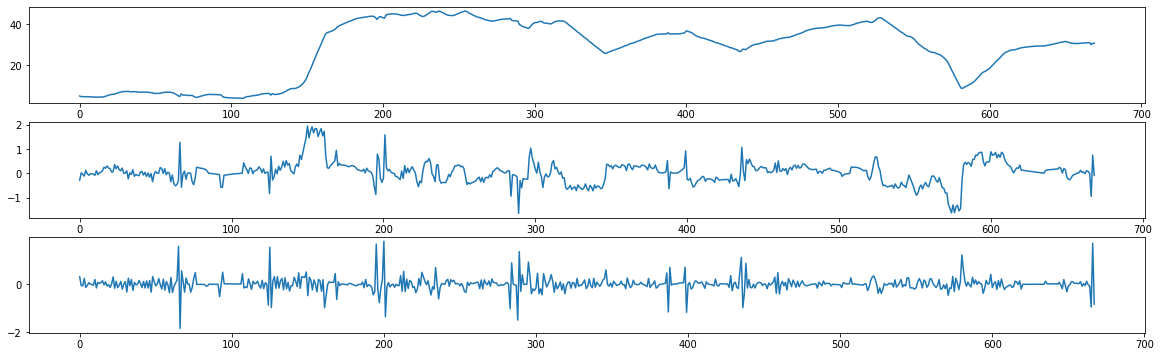

In [539]:
plt.figure(figsize=(20, 6))
plt.subplot(311)
plt.plot(x)
plt.subplot(312)
plt.plot(v)
plt.subplot(313)
plt.plot(a)
plt.show()

In [544]:
# ap = (a/2.).clone().float().requires_grad_()
ap = torch.zeros_like(a).float().requires_grad_()

opt = torch.optim.Adam([ap], lr=1e-4)
reg = 0e0

for i in tqdm(range(50000)):
    vp = torch.cat([v[[0]], v[0]+ap.cumsum(dim=0)], dim=0)
    xp = torch.cat([x[[0]], x[0]+vp.cumsum(dim=0)], dim=0)
    
    loss = (xp-x).pow(2).mean() + reg*ap.diff().pow(2).mean()
    # loss = (xp-x).pow(2).mean() + reg*ap.diff().abs().mean()
    
    if i%500==0:
        print(loss.item())
    
    opt.zero_grad()
    loss.backward()
    opt.step()


  0%|          | 0/50000 [00:00<?, ?it/s]

18181.16595370707
87.21107483586003
38.35930777125091
26.37633419516249
22.27540129745087
19.95570922206078
18.127239819102865
16.45924835953381
14.867745246876495
13.347058632226563
11.897170276731693
10.503989273545006
9.152751496863152
7.846964248768396
6.613999713370395
5.5635684993926455
4.8093185056401175
6.822013517330227
3.8441689394821212
3.5288866843203572
3.2833826684787097
3.0840887427078854
2.9253763586661745
2.7843294205552107
2.6686172039278
2.646358567004148
2.478193755336459
2.3978471716075576
2.4218878726265562
2.257729716926999
2.1960161402392506
2.1382825866997783
2.08453016224768
2.0470963427902293
1.9851550622656406
1.9393216254772903
1.8959636064657137
1.854258443239675
1.8148530678919412
1.7923380938694127
1.74110044832475
1.7057338187584279
1.6723961163684296
1.6417138715795894
1.6097265372290805
1.5804309773906922
1.5519102710410182
1.5245497291023686
1.4982132249452838
1.507769342983358
1.4484125662352356
1.42476611545735
1.401878225398643
1.3799294241864315


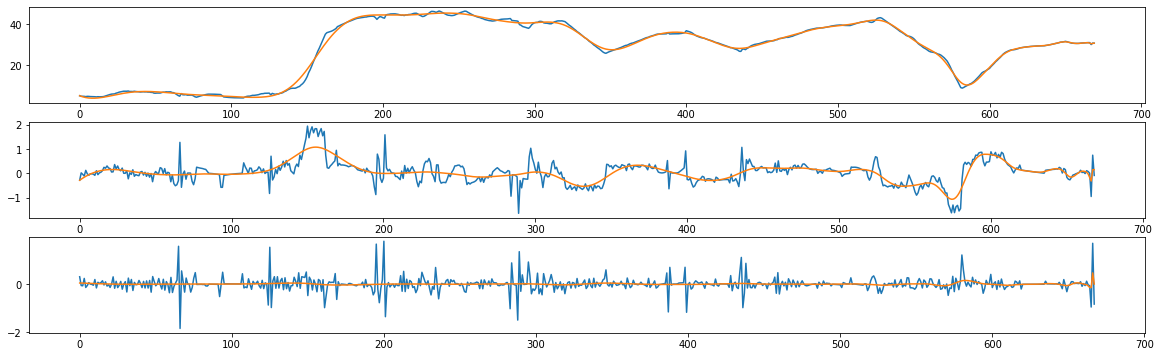

In [545]:
plt.figure(figsize=(20, 6))
plt.subplot(311)
plt.plot(x)
plt.plot(xp.detach().cpu().numpy())
plt.subplot(312)
plt.plot(v)
plt.plot(vp.detach().cpu().numpy())
plt.subplot(313)
plt.plot(a)
plt.plot(ap.detach().cpu().numpy())
plt.show()

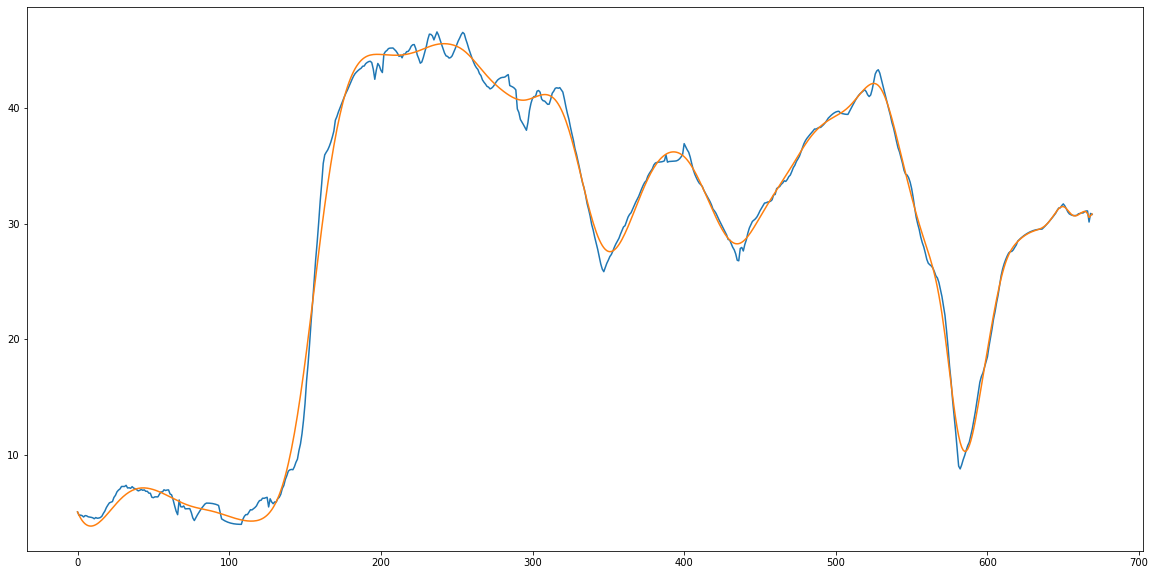

In [546]:
plt.figure(figsize=(20, 10))
plt.plot(x)
plt.plot(xp.detach().cpu().numpy())

In [547]:
(x-xp).abs().max()

tensor(4.6056, dtype=torch.float64, grad_fn=<MaxBackward1>)